#### Topics need to cover
   - Biological vs. Artificial Neurons  
   - Perceptron and Activation Functions (Sigmoid, Tanh, ReLU, Leaky ReLU, Swish, GELU)  
   - Feedforward Neural Networks (FNN)  
   - Loss Functions (MSE, Cross-Entropy, Hinge Loss, KL Divergence)  
   - Gradient Descent (Batch, Mini-Batch, Stochastic)  


# Perceptron?

### **Perceptron: The Foundation of Neural Networks**  

The **Perceptron** is the simplest type of artificial neural network, introduced by **Frank Rosenblatt in 1958**. It is a **binary classifier** that determines whether an input belongs to one of two categories. It forms the foundation for more advanced neural networks.  



## **1. Structure of a Perceptron**  

A perceptron consists of the following components:  

![perceptron](https://res.cloudinary.com/dyl5ibyvg/image/upload/v1743025011/i2fqculwlzobaan2rks0.png)

## **2. Working of a Perceptron**  

1. **Inputs are received** – Feature values (x_1, x_2, ..., x_n) are provided.  
2. **Weighted sum is computed** – The perceptron multiplies inputs by weights and adds bias.  
3. **Activation function is applied** – Uses a step function to classify the data into two categories.  
4. **Output is generated** – Either **1 (positive class)** or **0 (negative class)**.  

### **Step Function (Threshold Activation Function)**  

![Perceptron](https://res.cloudinary.com/dyl5ibyvg/image/upload/v1743025012/yvthilbymg7tlvozfrkt.png)

## **3. Perceptron Learning Algorithm**  

The perceptron **learns** by adjusting weights based on errors in classification. The weight update rule is:  

![Perceptron](https://res.cloudinary.com/dyl5ibyvg/image/upload/v1743025012/pjltgxzo4xbfmxsylh3k.png)

### **Training Process:**  

1. Initialize weights and bias randomly.  
2. Compute the **predicted output** for each training sample.  
3. Update the weights based on the error.  
4. Repeat until the classification error is minimized.  



## **4. Limitations of Perceptron**  

1. **Works only for linearly separable data** (cannot solve XOR problem).  
2. **Fails for complex decision boundaries** that require non-linear functions.  
3. **Sensitive to noise** in the dataset.  

To overcome these limitations, **Multi-Layer Perceptrons (MLPs)** and activation functions like **ReLU, Sigmoid, and Tanh** were introduced.  



## **5. Python Implementation of a Perceptron** 

In [ ]:
import numpy as np

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, x):
        z = np.dot(self.weights, x) + self.bias
        return step_function(z)

    def train(self, X, y):
        for _ in range(self.epochs):
            for xi, yi in zip(X, y):
                y_pred = self.predict(xi)
                error = yi - y_pred
                self.weights += self.learning_rate * error * xi
                self.bias += self.learning_rate * error

# Example Dataset (AND gate)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND gate labels

# Train Perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(X, y)

# Test Perceptron
for sample in X:
    print(f"Input: {sample}, Prediction: {perceptron.predict(sample)}")


Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1


#### **R implementation** of a **Perceptron** using a basic dataset (AND logic gate).  

In [ ]:
### **📌 R Implementation of Perceptron**
# Perceptron implementation in R

# Step Activation Function
step_function <- function(x) {
  if (x >= 0) return(1) else return(0)
}

# Perceptron Model
perceptron <- function(X, y, learning_rate = 0.1, epochs = 10) {
  n_samples <- nrow(X)  # Number of training samples
  n_features <- ncol(X) # Number of input features
  
  # Initialize weights and bias
  weights <- rep(0, n_features)
  bias <- 0
  
  for (epoch in 1:epochs) {
    for (i in 1:n_samples) {
      # Compute weighted sum
      z <- sum(weights * X[i,]) + bias
      y_pred <- step_function(z)
      
      # Update weights if there is an error
      error <- y[i] - y_pred
      weights <- weights + learning_rate * error * X[i,]
      bias <- bias + learning_rate * error
    }
  }
  
  return(list(weights = weights, bias = bias))
}

# Prediction function
predict_perceptron <- function(model, X) {
  predictions <- sapply(1:nrow(X), function(i) {
    z <- sum(model$weights * X[i,]) + model$bias
    step_function(z)
  })
  return(predictions)
}

# Example Dataset (AND Gate)
X <- matrix(c(0, 0,
              0, 1,
              1, 0,
              1, 1), ncol = 2, byrow = TRUE)
y <- c(0, 0, 0, 1)  # AND Gate Labels

# Train Perceptron
model <- perceptron(X, y)

# Test Perceptron
predictions <- predict_perceptron(model, X)
print(data.frame(X, Prediction = predictions))


  X1 X2 Prediction
1  0  0          0
2  0  1          0
3  1  0          0
4  1  1          1


### **📝 Explanation:**
1. **`step_function(x)`** – Implements a **step activation function**.  
2. **`perceptron(X, y, learning_rate, epochs)`**  
   - Initializes **weights & bias** to 0.  
   - Iterates through training data, adjusting weights using the **Perceptron Learning Rule**.  
3. **`predict_perceptron(model, X)`** – Computes predictions using trained weights.  
4. **Dataset (AND Gate)** – A simple binary classification problem.  
5. **Model Training & Testing** – Prints predictions for all inputs.  



### **🚀 Output**
```
  X1 X2 Prediction
1  0  0          0
2  0  1          0
3  1  0          0
4  1  1          1
```
✅ Correctly classifies the **AND logic gate**!  


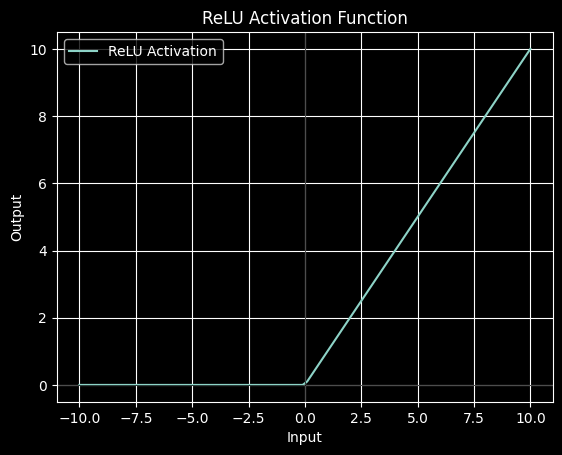

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate input values
x = np.linspace(-10, 10, 100)
y = relu(x)

# Plot ReLU function
plt.style.use('dark_background')
plt.plot(x, y, label="ReLU Activation")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("ReLU Activation Function")
plt.legend()
plt.grid()
plt.show()


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


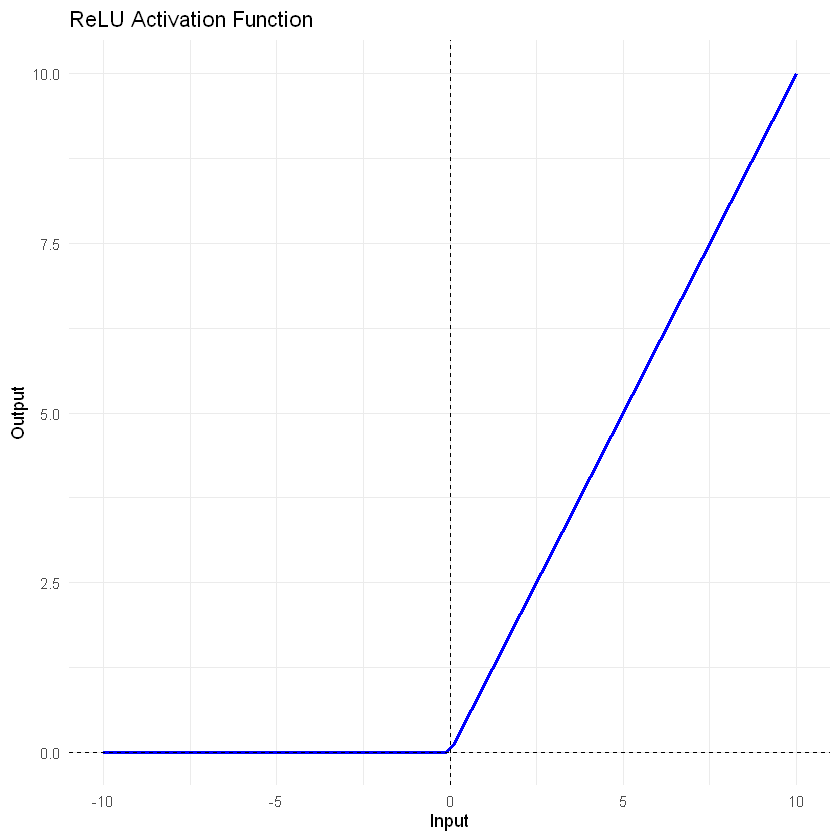

In [ ]:
# Load required library
library(ggplot2)

# Define ReLU function
relu <- function(x) {
  return(pmax(0, x))  # Apply max(0, x) element-wise
}

# Generate input values
x_values <- seq(-10, 10, length.out = 100)
y_values <- relu(x_values)

# Create a data frame for plotting
df <- data.frame(x = x_values, y = y_values)

# Plot ReLU function
ggplot(df, aes(x, y)) +
  geom_line(color = "blue", size = 1) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  geom_vline(xintercept = 0, linetype = "dashed", color = "black") +
  ggtitle("ReLU Activation Function") +
  xlab("Input") +
  ylab("Output") +
  theme_minimal()


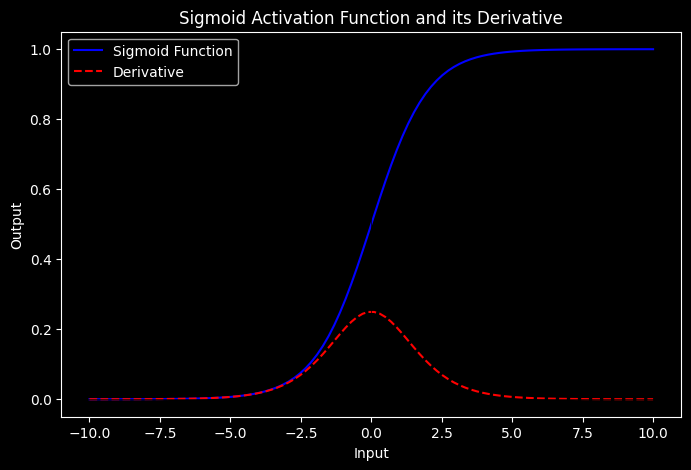

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Generate values for visualization
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
dy = sigmoid_derivative(x)

# Plot the sigmoid function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Sigmoid Function", color="blue")
plt.plot(x, dy, label="Derivative", color="red", linestyle="dashed")
plt.axhline(y=0, color="black", linewidth=0.5)
plt.axvline(x=0, color="black", linewidth=0.5)
plt.legend()
plt.title("Sigmoid Activation Function and its Derivative")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

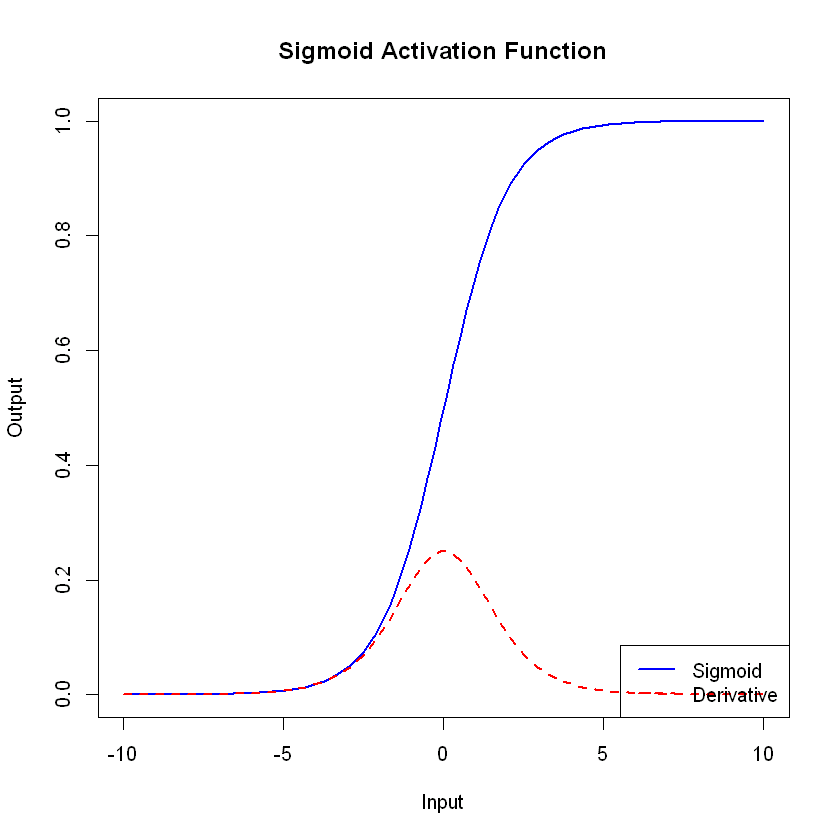

In [ ]:


### **R Implementation of Sigmoid Activation Function**  

# Sigmoid Function
sigmoid <- function(x) {
  return(1 / (1 + exp(-x)))
}

# Derivative of Sigmoid
sigmoid_derivative <- function(x) {
  s <- sigmoid(x)
  return(s * (1 - s))
}

# Generate values for visualization
x <- seq(-10, 10, length.out = 100)
y <- sigmoid(x)
dy <- sigmoid_derivative(x)

# Plot Sigmoid Function
plot(x, y, type = "l", col = "blue", lwd = 2, ylab = "Output", xlab = "Input", main = "Sigmoid Activation Function")
lines(x, dy, col = "red", lwd = 2, lty = 2)
legend("bottomright", legend = c("Sigmoid", "Derivative"), col = c("blue", "red"), lty = c(1, 2), lwd = 2)



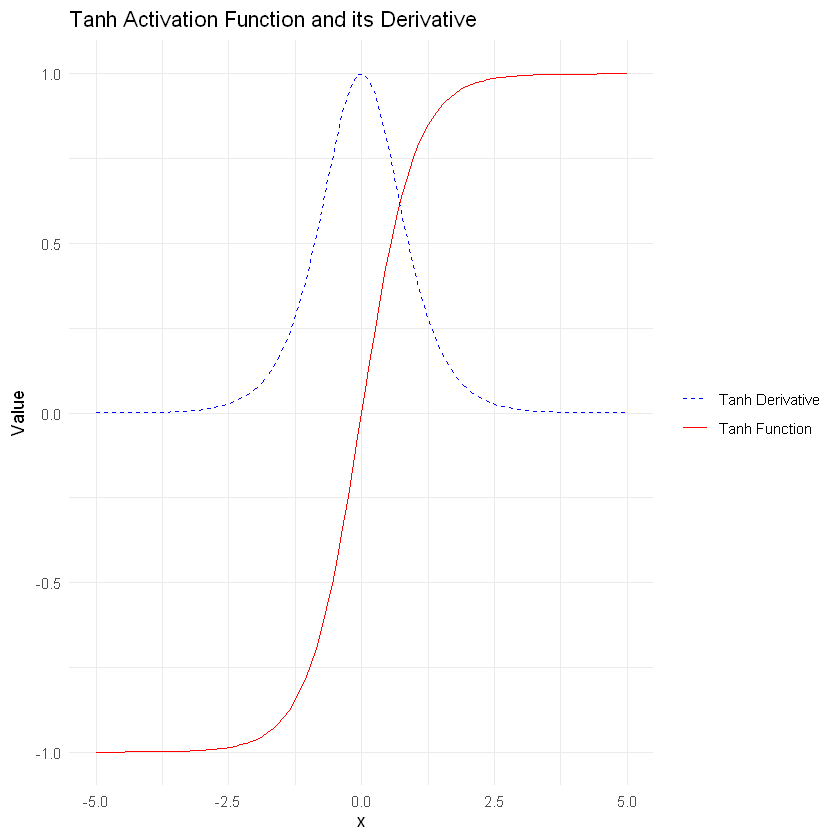

In [ ]:

### **R Implementation of Tanh Activation Function**

# Load necessary library
library(ggplot2)

# Define Tanh function
tanh_function <- function(x) {
  return (tanh(x))
}

# Derivative of Tanh function
tanh_derivative <- function(x) {
  return (1 - tanh(x)^2)
}

# Generate input values
x_values <- seq(-5, 5, length.out = 100)

# Compute function values
y_values <- tanh_function(x_values)
dy_values <- tanh_derivative(x_values)

# Create data frame for plotting
data <- data.frame(x = x_values, tanh = y_values, derivative = dy_values)

# Plot Tanh function and its derivative
ggplot(data, aes(x)) +
  geom_line(aes(y = tanh, color = "Tanh Function")) +
  geom_line(aes(y = derivative, color = "Tanh Derivative"), linetype = "dashed") +
  labs(title = "Tanh Activation Function and its Derivative", y = "Value") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "red")) +
  theme(legend.title = element_blank())



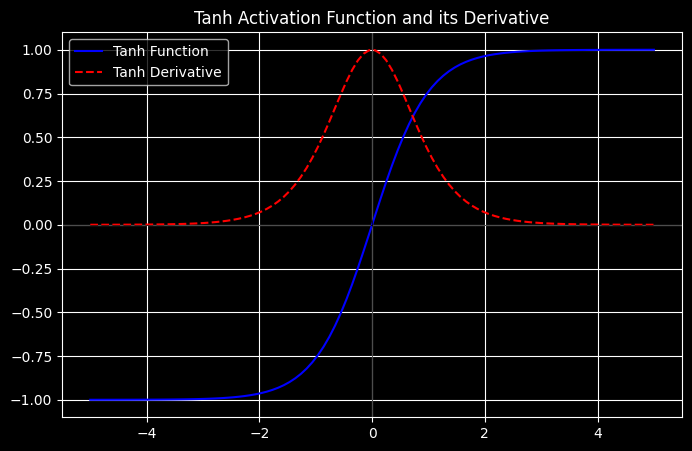

In [ ]:
### **Python Implementation of Tanh Activation Function**

import numpy as np
import matplotlib.pyplot as plt

# Tanh function
def tanh(x):
    return np.tanh(x)

# Derivative of Tanh function
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Generate input values
x = np.linspace(-5, 5, 100)

# Compute function values
y = tanh(x)
dy = tanh_derivative(x)

# Plot Tanh function and its derivative
plt.style.use('dark_background')
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Tanh Function", color="blue")
plt.plot(x, dy, label="Tanh Derivative", color="red", linestyle="dashed")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title("Tanh Activation Function and its Derivative")
plt.legend()
plt.grid()
plt.show()


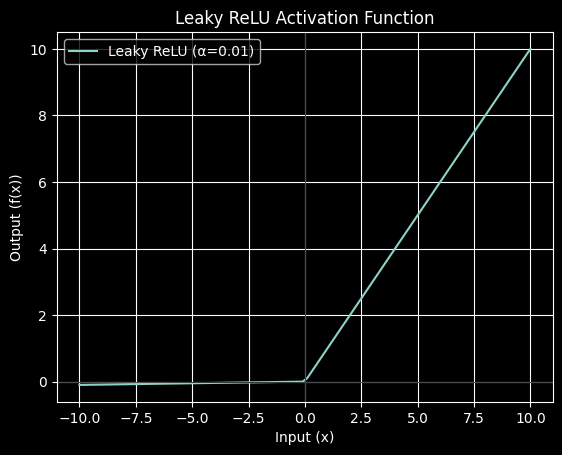

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Generate input values
x = np.linspace(-10, 10, 100)
y = leaky_relu(x)

# Plot the function
plt.plot(x, y, label="Leaky ReLU (α=0.01)")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Leaky ReLU Activation Function")
plt.xlabel("Input (x)")
plt.ylabel("Output (f(x))")
plt.grid()
plt.show()


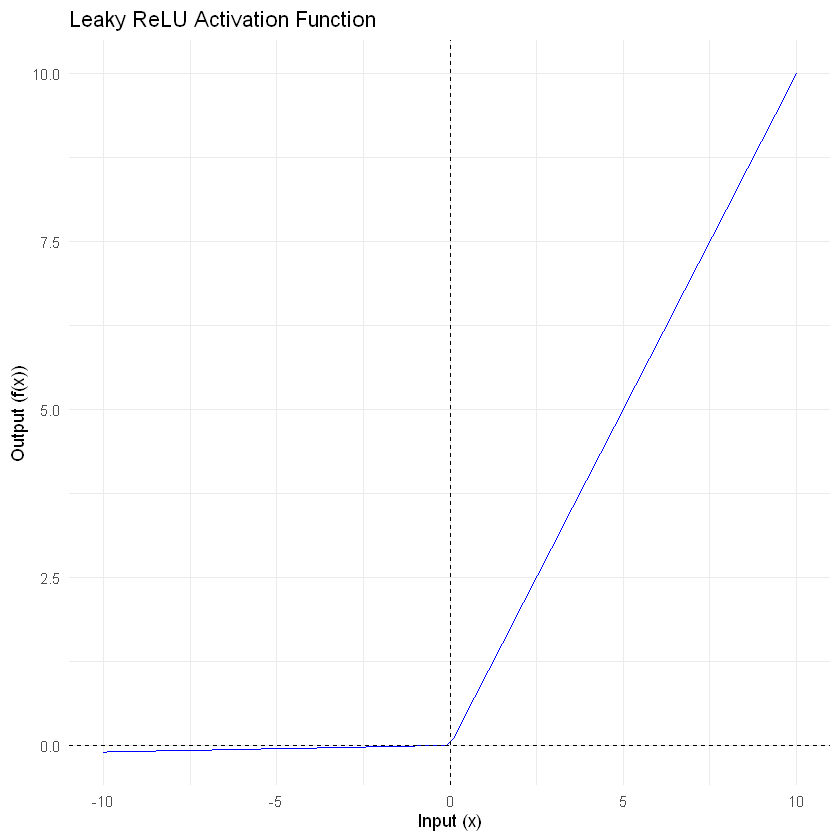

In [ ]:
leaky_relu <- function(x, alpha = 0.01) {
  ifelse(x > 0, x, alpha * x)
}

# Generate input values
x <- seq(-10, 10, length.out = 100)
y <- leaky_relu(x)

# Plot the function
library(ggplot2)
df <- data.frame(x, y)

ggplot(df, aes(x, y)) +
  geom_line(color = "blue") +
  ggtitle("Leaky ReLU Activation Function") +
  xlab("Input (x)") +
  ylab("Output (f(x))") +
  theme_minimal() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  geom_vline(xintercept = 0, linetype = "dashed")


In [ ]:
import numpy as np

def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z)

# Example usage
logits = np.array([2.0, 1.0, 0.1])
probabilities = softmax(logits)

print("Softmax Probabilities:", probabilities)


Softmax Probabilities: [0.65900114 0.24243297 0.09856589]


In [ ]:
softmax <- function(z) {
  exp_z <- exp(z - max(z))  # Subtract max for numerical stability
  return(exp_z / sum(exp_z))
}

# Example usage
logits <- c(2.0, 1.0, 0.1)
probabilities <- softmax(logits)

print(probabilities)


[1] 0.65900114 0.24243297 0.09856589


In [ ]:
# Define the ELU activation function
elu <- function(x, alpha = 1.0) {
  ifelse(x > 0, x, alpha * (exp(x) - 1))
}

# Generate input values
x <- seq(-5, 5, length.out = 100)
y <- elu(x)

# Plot the ELU function
plot(x, y, type = "l", col = "blue", lwd = 2,
     xlab = "Input", ylab = "Output",
     main = "ELU Activation Function")
abline(h = 0, lty = 2, col = "black")
abline(v = 0, lty = 2, col = "black")


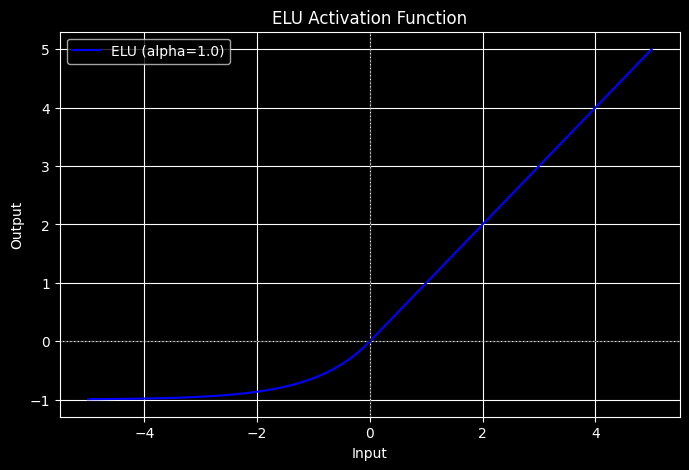

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def elu(x, alpha=1.0):
    """
    Exponential Linear Unit (ELU) activation function.
    For x > 0, returns x.
    For x <= 0, returns alpha*(exp(x) - 1).
    """
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

# Generate input values
x = np.linspace(-5, 5, 100)
y = elu(x)

# Plot ELU function
plt.style.use('dark_background')
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="ELU (alpha=1.0)", color="blue")
plt.axhline(0, color="black", linewidth=0.5, linestyle="dashed")
plt.axvline(0, color="black", linewidth=0.5, linestyle="dashed")
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("ELU Activation Function")
plt.legend()
plt.grid(True)
plt.show()


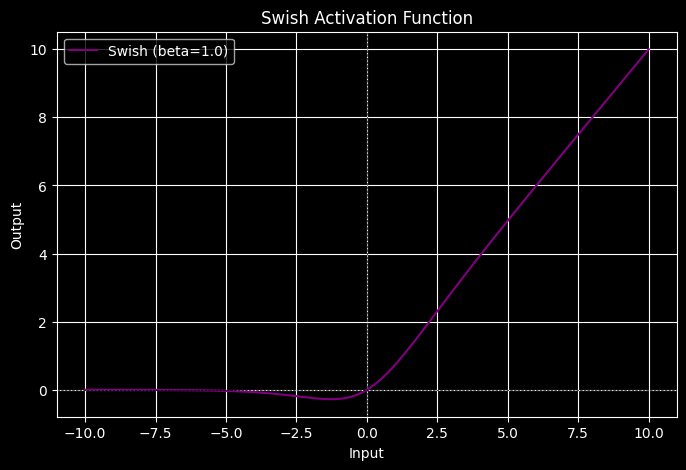

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def swish(x, beta=1.0):
    """
    Swish activation function: f(x) = x * sigmoid(beta * x)
    """
    return x * (1 / (1 + np.exp(-beta * x)))

# Generate input values
x = np.linspace(-10, 10, 200)
y = swish(x, beta=1.0)

# Plot Swish function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Swish (beta=1.0)", color="purple")
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Swish Activation Function")
plt.legend()
plt.grid(True)
plt.show()


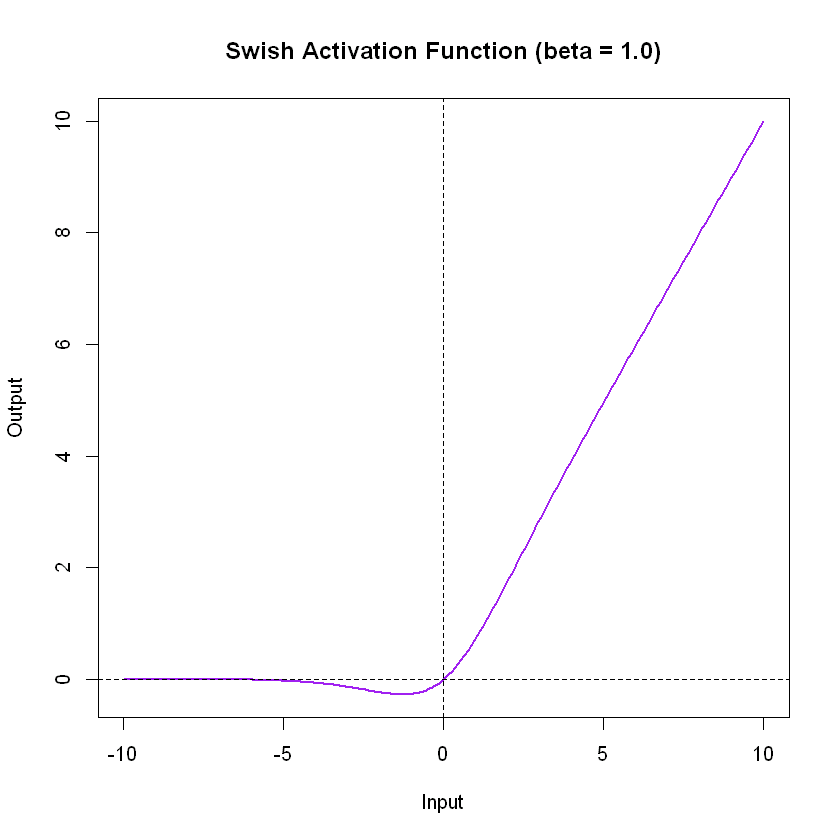

In [ ]:
# Define Swish activation function
swish <- function(x, beta = 1.0) {
  return(x * (1 / (1 + exp(-beta * x))))
}

# Generate input values
x <- seq(-10, 10, length.out = 200)
y <- swish(x, beta = 1.0)

# Plot Swish function
plot(x, y, type = "l", col = "purple", lwd = 2,
     xlab = "Input", ylab = "Output",
     main = "Swish Activation Function (beta = 1.0)")
abline(h = 0, v = 0, lty = 2, col = "black")


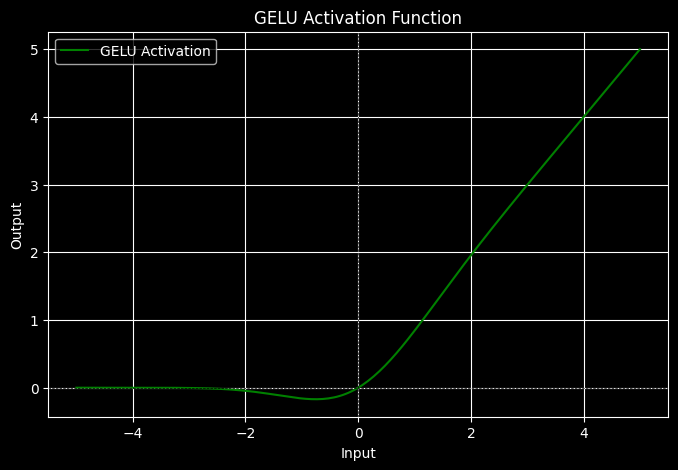

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gelu(x):
    """
    Computes the GELU activation function using the approximate formula:
    GELU(x) = 0.5 * x * [1 + tanh( sqrt(2/pi) * (x + 0.044715*x^3) ) ]
    """
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))

# Generate input values
x = np.linspace(-5, 5, 200)
y = gelu(x)

# Plot GELU function
plt.style.use('dark_background')
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="GELU Activation", color="green")
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("GELU Activation Function")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer, Dense, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Define custom Maxout layer
class Maxout(Layer):
    def __init__(self, units, k=2, **kwargs):
        self.units = units  # Number of maxout units
        self.k = k          # Number of affine pieces per unit
        super(Maxout, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.input_dim = int(input_shape[-1])
        # Weight matrix shape: (input_dim, units * k)
        self.W = self.add_weight(
            name='W',
            shape=(self.input_dim, self.units * self.k),
            initializer='glorot_uniform',
            trainable=True
        )
        # Bias vector shape: (units * k,)
        self.b = self.add_weight(
            name='b',
            shape=(self.units * self.k,),
            initializer='zeros',
            trainable=True
        )
        super(Maxout, self).build(input_shape)
    
    def call(self, inputs):
        # Compute linear transformation: shape (batch_size, units*k)
        z = K.dot(inputs, self.W) + self.b
        # Reshape to (batch_size, units, k)
        z = K.reshape(z, (-1, self.units, self.k))
        # Take max across k dimension: result shape (batch_size, units)
        return K.max(z, axis=-1)
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

# Example usage of the Maxout layer in a simple model
input_data = Input(shape=(20,))
x = Dense(40)(input_data)  # Some intermediate Dense layer
x = Maxout(units=10, k=2)(x) # Apply Maxout activation
output_data = Dense(3, activation='softmax')(x)

model = Model(inputs=input_data, outputs=output_data)
model.summary()

# Visualizing Maxout behavior on random data:
sample_input = np.random.rand(5, 20)  # 5 samples, 20 features
maxout_output = model.predict(sample_input)
print("Maxout layer output shape:", maxout_output.shape)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
library(keras)

# Define a custom Maxout layer using R6
Maxout <- R6::R6Class("Maxout",
  inherit = KerasLayer,
  
  public = list(
    units = NULL,
    k = NULL,
    W = NULL,
    b = NULL,
    
    initialize = function(units, k = 2) {
      self$units <- as.integer(units)
      self$k <- as.integer(k)
    },
    
    build = function(input_shape) {
      input_dim <- tail(input_shape, 1)
      self$W <- self$add_weight(
        name = "W",
        shape = c(as.integer(input_dim), self$units * self$k),
        initializer = initializer_glorot_uniform(),
        trainable = TRUE
      )
      self$b <- self$add_weight(
        name = "b",
        shape = c(self$units * self$k),
        initializer = initializer_zeros(),
        trainable = TRUE
      )
    },
    
    call = function(inputs, mask = NULL) {
      # Compute linear transformation
      z <- k_dot(inputs, self$W) + self$b
      # Reshape z to shape (batch_size, units, k)
      z <- k_reshape(z, c(-1, self$units, self$k))
      # Compute maximum over the k dimension
      k_max(z, axis = -1)
    },
    
    compute_output_shape = function(input_shape) {
      list(input_shape[[1]], self$units)
    }
  )
)

# Create a wrapper function for the custom layer
layer_maxout <- function(object, units, k = 2, name = NULL, trainable = TRUE) {
  create_layer(Maxout, object, list(units = units, k = k, name = name, trainable = trainable))
}

# Example usage in a simple model
model <- keras_model_sequential() %>%
  layer_dense(units = 40, input_shape = c(20)) %>%
  layer_maxout(units = 10, k = 2) %>%
  layer_dense(units = 3, activation = "softmax")

summary(model)

# Generate some sample data and get predictions from the model
sample_input <- matrix(runif(5 * 20), nrow = 5, ncol = 20)  # 5 samples, 20 features
maxout_output <- model %>% predict(sample_input)
print(dim(maxout_output))


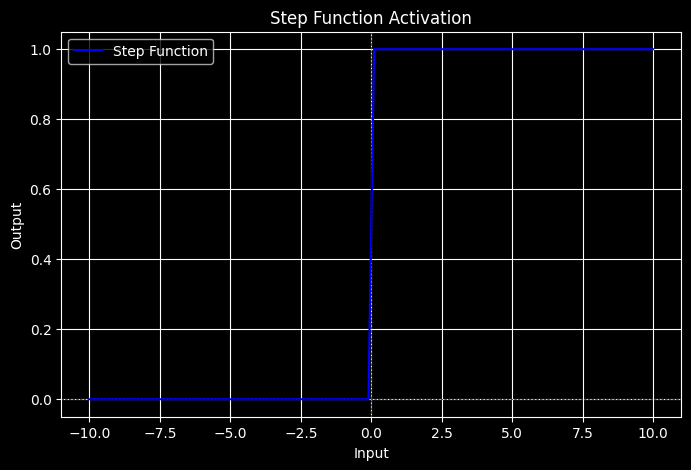

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x, theta=0):
    """
    Computes the step function.
    Returns 1 if x >= theta, else returns 0.
    """
    return np.where(x >= theta, 1, 0)

# Generate input values
x = np.linspace(-10, 10, 100)
y = step_function(x)

# Plot the step function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Step Function", color="blue")
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.title("Step Function Activation")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to categorical (one-hot encoding)
y_train_cat = keras.utils.to_categorical(y_train, num_classes=3)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=3)

# Build a simple Feedforward Neural Network (MLP)
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # 3 classes for Iris dataset
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, 
                    epochs=50, 
                    batch_size=16, 
                    validation_split=0.2, 
                    verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

# Plot training history
plt.style.use('dark_background')
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject